# Modelo ML

Como objetivo de nuestro modelo, vamos a intentar predecir el rendimiento en matemática de los alumnos, teniendo en cuenta las variables no númericas (no considerando las notas en las evaluaciones). 

La variable a predecir es: mdesemp

Sus valores posibles son:

1 - Por debajo del básico

2 - Básico

3 - Satisfactorio

4 - Avanzado

In [28]:


df = pd.read_csv('Aprender2018-primaria-6.csv', delimiter=";", )

In [29]:
#Reemplazamos por NaNs los -9 y -6 que corresponden a valores blancos y multiples elecciones
df = df.replace([-9,-6,-1],np.nan)
df.shape

(579510, 124)

In [30]:
#Ver cuantos nans quedan en las columnas
faltantes = df.isna().sum().to_frame()
faltantes.columns = ['Faltantes']
faltantes = faltantes.sort_values('Faltantes', ascending=False)
faltantes.transpose()

,ap5h,ap42,ap38,ap36d,ap34b,ap36c,ap36b,ap34a,ap34c,ap36a,...,ICSE,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioal,isocioam
Faltantes,573195,565639,559777,534229,533453,533449,531908,531417,531070,526929,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Eliminamos las columnas que no tienen por lo menos 500000 valores no NaN
df=df.dropna(axis=1, thresh=500000)

In [32]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = (df.replace('\.','', regex=True)
                        .replace(',','.', regex=True)
                        .astype(float))
df = df.dropna()
df

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap6,ap7a,ap7b,...,ICSE,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioal,isocioam
0,4.0,2.0,1.0,1.0,1.0,10.0,2.0,3.0,2.0,1.0,...,1.0,3.164231,3.478725,4.0,624.30237,3.637901,3.0,497.96060,-1.0,-1.0
1,2.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,...,1.0,3.164231,3.478725,3.0,541.39209,3.637901,3.0,511.72632,1.0,1.0
5,3.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,...,3.0,2.203661,2.208158,3.0,464.68726,2.210872,3.0,572.68365,2.0,2.0
6,3.0,1.0,1.0,5.0,5.0,4.0,1.0,5.0,1.0,1.0,...,3.0,2.203661,2.208158,4.0,689.28796,2.210872,3.0,563.13281,2.0,2.0
10,3.0,2.0,5.0,5.0,5.0,5.0,1.0,2.0,2.0,1.0,...,3.0,2.644393,3.478725,3.0,459.72522,3.316307,2.0,462.78299,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579505,3.0,2.0,1.0,1.0,1.0,5.0,1.0,6.0,1.0,1.0,...,1.0,1.203005,1.204447,3.0,536.84021,1.267857,2.0,426.88309,-1.0,-1.0
579506,3.0,2.0,1.0,1.0,1.0,8.0,1.0,5.0,1.0,1.0,...,1.0,1.203005,1.204447,3.0,515.03595,1.267857,2.0,422.74527,3.0,3.0
579507,3.0,2.0,1.0,1.0,1.0,6.0,1.0,2.0,1.0,1.0,...,1.0,1.203005,1.204447,4.0,565.87970,1.267857,2.0,423.95142,2.0,2.0
579508,3.0,2.0,1.0,1.0,1.0,6.0,1.0,6.0,1.0,1.0,...,1.0,1.203005,1.204447,4.0,550.91693,1.267857,3.0,469.24432,3.0,3.0


In [33]:
xd = df.drop(['mdesemp','lpuntaje','mpuntaje','ldesemp','ponder','lpondera','mpondera'],axis=1)
x = pd.get_dummies(xd,columns=xd.columns)
xinput = x
x

,ap1_1.0,ap1_2.0,ap1_3.0,ap1_4.0,ap1_5.0,ap2_1.0,ap2_2.0,ap3a_1.0,ap3a_2.0,ap3a_3.0,...,ICSE_2.0,ICSE_3.0,isocioal_-1.0,isocioal_1.0,isocioal_2.0,isocioal_3.0,isocioam_-1.0,isocioam_1.0,isocioam_2.0,isocioam_3.0
0,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
6,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
10,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579505,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
579506,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
579507,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
579508,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [35]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 10
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xinput))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [36]:
x = xpca
y = df['mdesemp']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)

In [37]:
pca.explained_variance_

array([1.77984674, 1.33112793, 0.88354423, 0.85510134, 0.71176949,
       0.67593347, 0.62244429, 0.60843095, 0.5505256 , 0.50367667])

In [38]:
xpca.shape

(260015, 10)

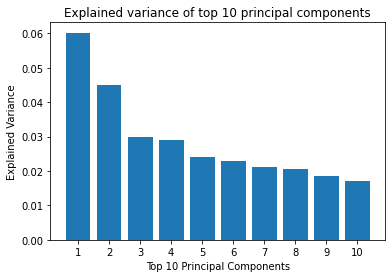

In [39]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')
plt.xlabel('Top ' +str(n_comps) + ' Principal Components')
plt.ylabel('Explained Variance')
plt.show()

No handles with labels found to put in legend.


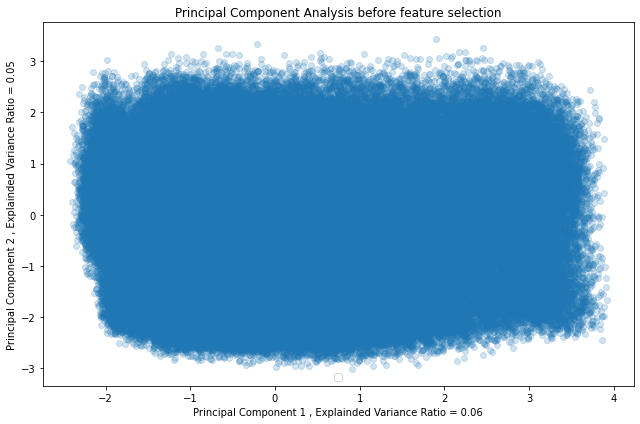

In [40]:
# scatter plot de los datos solamente con las 2 primeras componentes principales de los datos
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [41]:
clf = KNeighborsClassifier(n_neighbors=5)

In [42]:
clf.fit(xtrain,ytrain)

KNeighborsClassifier()

In [43]:
ypred = clf.predict(xtest)

In [44]:
test_acc = accuracy_score(ytest, ypred)
test_acc

0.38001410166015

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[ 1571  2224  3944   824]
 [ 2060  3299  6869  1749]
 [ 3105  6120 17260  6549]
 [ 1321  2793 10804  7513]]


In [46]:
test_acc = accuracy_score(ytest, ypred)
test_acc

0.38001410166015

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
knn2 =  KNeighborsClassifier()

In [50]:
#Hacemos un gridsearch para ver cuales son los mejores parametros
knn2 = KNeighborsClassifier()
parameters = {'n_neighbors':[4,5,6,7]}
grid_knn = GridSearchCV(knn2, param_grid=parameters, scoring='accuracy')
grid_knn.fit(xtrain, ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6, 7]}, scoring='accuracy')

In [51]:
#Veo cuales son los mejores parametros resultantes del GridSearchCV y su score
print('Mejores Parametros obtenidos del GridSearchCV:')
grid_knn.best_params_,grid_knn.best_score_

Mejores Parametros obtenidos del GridSearchCV:


({'n_neighbors': 7}, 0.3897697928685237)

Podemos ver que el mejor score que podemos obtener, a partir de los mejores parametros obtenidos para el modelo, es de un 0.389, que es un accuracy muy bajo. 

Como conclusión podemos decir que el dataset no contiene información suficiente (features) que permitan predecir el rendimiento en matemática de los alumnos, por lo menos utilizando este tipo de modelo (KNN). Se podrían explorar otros modelos para intentar obtener mejores resultados en las predicciones (mejorar el accuracy).